# Анализ данных по продажам йогурта в магазинах "Лента" 

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
#для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
#для регулярных выражений
import re

## Загрузка данных и описание файла

In [2]:
from google.colab import files
files.upload()
df = pd.read_excel('testovoe_lenta.xlsx')
df.info()

Saving testovoe_lenta.xlsx to testovoe_lenta.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41715 entries, 0 to 41714
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Год      41715 non-null  int64 
 1   Месяц    41715 non-null  int64 
 2   Город    41715 non-null  object
 3   Продажи  41715 non-null  int64 
 4   SKU      41715 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.6+ MB


In [3]:
df.head(10)

,Год,Месяц,Город,Продажи,SKU
0,2017,3,Кемерово,626,"Йогурт ЧУДО молочный Fresh персик-маракуйя 2,5..."
1,2017,3,Ачинск,38,Продукт йогуртный FRUTTIS паст. банан-клуб/мул...
2,2017,5,Бийск,276,Йогурт АЛТАЙСКАЯ БУРЁНКА фруктово-ягодный с че...
3,2016,3,Иркутск,288,"Йогурт БОЛЬШАЯ КРУЖКА черника-ежевика 1,9% без..."
4,2017,3,Омск,2520,Йогурт ЧУДО питьевой фруктовый малина-ежевика ...
5,2017,4,Прокопьевск,189,"Паста творожная САВУШКИН ПРОДУКТ черника 3,5% ..."
6,2016,3,Ачинск,73,Напиток VELLE сокосодержащий из фруктов Смусси...
7,2016,5,Ачинск,26,Биопродукт кисломолочный DANONE обог. бифид. A...
8,2016,5,Кемерово,2765,Продукт молочный DANONE с твор. кремом Груша-Б...
9,2017,1,Кемерово,3280,Йогурт ЧУДО фруктовый со вкусом Персик-Маракуй...


**Вывод**

Файл состоит из 5ти столбцов и 41715 строк.  Пропусков в данных нет.  
Необходимо:  
1) Наименования столбцов заминить латиницей в нижнем регистре.   
2) Проверить наличие дубликатов.    
3) По столбцу SKU - создать категории товаров (Йогурт, биойогурт)  
4) По столбцу SKU - создать категории производителей кисломолочной продукции.

## Предобработка данных

In [4]:
df.rename(columns = {'Год':'year','Месяц':'month','Город':'city','Продажи':'amount','SKU':'goods' }, inplace = True)

In [5]:
#проверим дубликаты
print('Количество грубых дубликатов:',df.duplicated().sum())
print('Количество неявных дубликатов {: .1f}%'.format((df[['city','amount','goods']].duplicated().sum())/len(df)*100))

Количество грубых дубликатов: 0
Количество неявных дубликатов  0.6%


Получилось, что грубых дубликатов нет. Есть неявные, например город - количество - продукт совпадают, но разные даты. Таких совпадений менее 1%, составим баг-репорт для дальнейшей проверки.

In [6]:
# сохраним дубликаты в отдельную таблицу
dupls = df.loc[df[['city','amount','goods']].duplicated() == True]
pd.set_option('display.max_colwidth', 100)
dupls.head()

,year,month,city,amount,goods
1849,2016,2,Юрга,546,"Биойогурт DANONE обог. бифид. ActiRegularis Активиа ложк. Вишня 2,9% без змж (Россия) 150г"
5494,2017,3,Красноярск,500,"Йогурт СВЕЖЕЕ ЗАВТРА клубника 1,9% без змж (Россия) 330г"
5633,2016,3,Барнаул,49,"Йогурт EHRMANN греческий виноград 4,8% без змж (Россия) 140г"
6112,2017,1,Ачинск,45,"Продукт йогуртный FRUTTIS паст Герои Disney А,Д,Е д/дет.с 3-хл малин/черн 2,5% без змж (Россия) ..."
6130,2016,1,Прокопьевск,113,"Йогурт МОЛОЧНАЯ СКАЗКА молочный фруктовый чернослив-злаки 2,5% п/бут без змж (Россия) 370г"


In [7]:
# создадим словарь производителей

#список со всеми уникальными продуктами
names = df['goods'].unique()
result = []
for good in names:
  maker = ''
# для каждого продукта выбираем слова, написанные заглавными буквами
  for word in good.split(' '): 
    if word.isupper():
      maker = maker + word + ' '
# записываем производителя в словарь
  result.append(maker)
category = pd.DataFrame(result)

In [8]:
maker = category[0].value_counts().reset_index().sort_values(by = 'index')
maker['index'].tolist()
#скорректировала список, убрала неявные дубликаты
maker_list = ['ALPRO ', 'BAKOMA ', 'BE HAPPY ', 'BE LIVE ', 'BIO MAX ', 'BIOБАЛАНС ', 'CAMPINA ', 'DANONE ',
 'EHRMANN ', 'EMMI ', 'EPICA ', 'FRUTTIS ', 'GRAND MOUSSE ', 'LANDLIEBE ', 'NEO ИМУНЕЛЕ ', 'VELLE ', 'ZORKA ',
 'АКТИМЕЛЬ ', 'АЛТАЙСКАЯ БУРЁНКА ', 'АЛТАЙСКИЙ МОЛОЧНИК ', 'БОЛЬШАЯ КРУЖКА ', 'ВЕНСКИЙ ЗАВТРАК ', 'ВНИМИ-СИБИРЬ ',
 'ВНИМИШКА ', 'ДЕРЕВЕНСКОЕ МОЛОЧКО ', 'ДЛЯ ВСЕЙ СЕМЬИ ', 'ДМЗ ', 'ДОМИК В ДЕРЕВНЕ ', 'ЗЕЛЕНЫЙ ЛУГ ', 'ЗОЛОТЫЕ ЛУГА ',
 'ИМУНЕЛЕ ', 'ИРМЕНЬ ', 'КАРАТ ', 'КМК ', 'КУПИНО ', 'ЛАКТ ', 'ЛАКТОВИТ ', 'ЛЕНТА ', 'ЛУЖАЙКИНО ', 'ЛУЗИНСКАЯ КРЫНОЧКА ',
 'МЗ ЗАМЕЛИТЕНОВСКИЙ ', 'МОЕ МОЛОКО ', 'МОЛОЧНАЯ СКАЗКА ', 'НЕЖНЫЙ ', 'ОПТИМАЛЬ ', 'ПРОСТОКВАШИНО ', 'РОДНАЯ ЗЕМЛЯ ',
 'САВУШКИН ', 'САВУШКИН ПРОДУКТ ', 'СВЕЖЕЕ ЗАВТРА ', 'СЕКРЕТ ФЕРМЫ ', 'СЛОБОДА ', 'ТАЕЖНЫЙ ИСТОК ', 'ТМ ЛАКТОМИР ', 'ФЕРМЕРСКИЙ ',
 'ФРУГУРТ ', 'ЧУДО ', 'ЮГМЗ ', 'ЯНТА ']

In [9]:
#функция, по списку заполняет производителя
def func_goods(goods):
  for maker in maker_list:
    if maker in goods:
      return maker
df['maker'] = df['goods'].apply(func_goods) 

In [10]:
#функция, заполняет категории товаров
def func_cat(goods):
      return re.search('\w+[а-я- ]+', goods).group()
df['category'] = df['goods'].apply(func_cat) 

In [11]:
df['category'].unique()

array(['Йогурт ', 'Продукт йогуртный ', 'Паста творожная ', 'Напиток ',
       'Биопродукт кисломолочный ', 'Продукт молочный ',
       'Продукт творожный ', 'Биойогурт ', 'Десерт творожный ', 'Десерт ',
       'Напиток кисломолочный ', 'Напиток йогуртный ', 'Десерт молочный ',
       'Продукт кисломолочный ', 'Творожок ', 'Мусс йогуртный ',
       'Крем творожный ', 'Коктейль йогуртный ', 'Биопродукт ', 'Мусс ',
       'Биопродукт творожно-йогуртный ', 'Продукт овсяный ',
       'Продукт молочный йогурт ', 'Паста '], dtype=object)

## Исследовательский анализ данных

### Суммарное количество продаж за каждый месяц

In [12]:
sum_month = df.groupby(['year','month']).agg({'amount':'sum'})
sum_month

amount
year month          
2016 1       9189276
     2       9331700
     3      11466029
     4       9356423
     5      10029128
2017 1       9395155
     2       8153148
     3       6156515
     4       9102276
     5       9583510

**Вывод**

**Данные предоставлены за период январь 2016 - май 2016 и январь 2017 - май 2017**, сравним суммарные продажи за этот период.

In [13]:
df_pivot = df.pivot_table(index='month', columns='year', values='amount', aggfunc='sum')
df_pivot = df_pivot /1000000
df_pivot['name_month'] = ['Январь', 'Февраль', 'Март', 'Апрель','Май']
df_pivot

year,2016,2017,name_month
month,,,
1,9.189276,9.395155,Январь
2,9.331700,8.153148,Февраль
3,11.466029,6.156515,Март
4,9.356423,9.102276,Апрель
5,10.029128,9.583510,Май


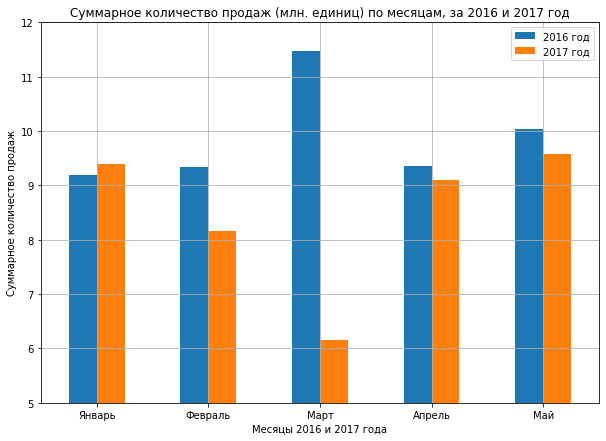

In [14]:
df_pivot.plot(x= 'name_month', y=[2016,2017], kind='bar', grid=True, label = ['2016 год','2017 год'],figsize=(10,7) ) 
plt.xlabel('Месяцы 2016 и 2017 года'), plt.ylabel('Суммарное количество продаж')
plt.title('Суммарное количество продаж (млн. единиц) по месяцам, за 2016 и 2017 год')
plt.xticks(rotation = 0)
plt.ylim((5,12))
plt.show()

**Вывод**

  Описание графика. Мы видим суммарное количество продаж (по всем городам) за каждый месяц. Количечество проданного товара начинается от 6ти млн. Синим цветом отмечены месяцы - 2016 года, оранжевым цветом месяцы - 2017 года. 
  Что можно отметить:  
1) В 2016 году продаж было больше (за исключением января, относительно других месяцев это разница не так выделяется)  
2) В 2016 году продажи за все месяцы превысили планку в 9 млн, что в сравнении с 2017 - февраль превысил 8млн, а март только 6млн.  
3)**Большая разница за 2016 и 2017 год отмечена в Марте, где продажи за 2016 почти в 2 раза превышают показатель 2017 года**

### Распределение количества продаж по годам

---



In [15]:
#проверим, одна строка в таблицы соответсвует количеству товара "A" в городе "B" за опреденный месяц года
print('Количество строк в первоначальной таблице',df.shape[0])
print('Количество строк в сгруппированной таблице',len(df.groupby(['goods','city','year','month'])['amount'].sum().reset_index()))

Количество строк в первоначальной таблице 41715
Количество строк в сгруппированной таблице 41715


Действительно она строка таблицы - это количество определенного наименования товара в городе за определенный месяц года 

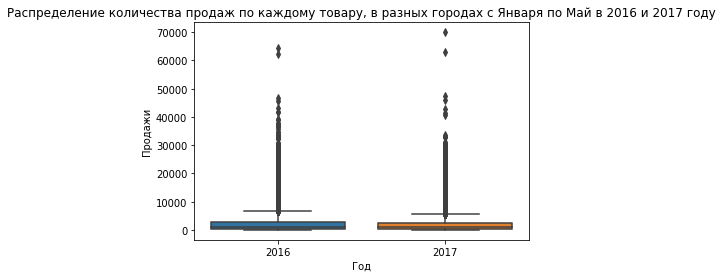

In [16]:
sns.boxplot(x='year', y='amount', data=df)
plt.xlabel('Год'), plt.ylabel('Продажи')
plt.title('Распределение количества продаж по каждому товару, в разных городах с Января по Май в 2016 и 2017 году');

**Вывод**

На графике мы видим небольшое количество товарных позиций с продажами более 10000единиц (в одном городе, за определенный месяц года.). Но если мы посмотрим на медиану, то большая часть значений состредоточена ниже 5000 единиц. Скорее всего выбросы - это продажи в крупных городах. Рзница между  2016 и 2017 годом не сильно заметна.  Медиана продаж 2016 года 1014, а для 2017 медианное значение 959 продаж.

In [17]:
#список городов
df['city'].unique()

array(['Кемерово', 'Ачинск', 'Бийск', 'Иркутск', 'Омск', 'Прокопьевск',
       'Братск', 'Юрга', 'Барнаул', 'Томск', 'Новокузнецк', 'Новосибирск',
       'Красноярск'], dtype=object)

In [18]:
print('Количество городов',df['city'].nunique())

Количество городов 13


### Количество продаж по городам в сравнении 2016 и 2017 года

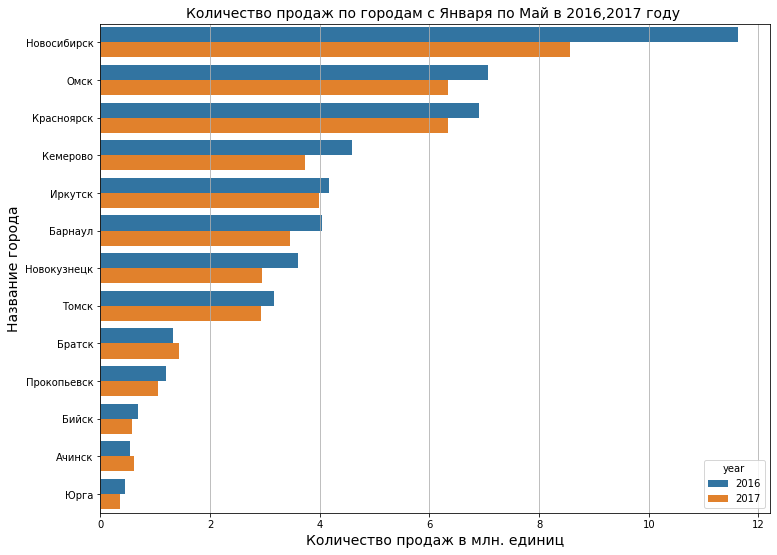

In [19]:
city = df.groupby(['city','year'])['amount'].sum().reset_index().sort_values(by ='amount', ascending = False)
city['amount'] = city['amount'] /1000000
plt.figure(figsize=(12,9))
plt.grid()
ax = sns.barplot(x='amount', y='city', hue = 'year', data=city )
ax.set_xlabel('Количество продаж в млн. единиц', fontsize=14)
ax.set_ylabel('Название города', fontsize=14)
ax.set_title('Количество продаж по городам с Января по Май в 2016,2017 году ', fontsize=14);

**Вывод**

По графику сравнения количества продаж 2016 и 2017 года по разным городам мы видим, что в 2016 году продаж равномерно больше, чем в 2017 году.   
Исключением можно назвать Ачинск, в котором в 2016 было меньше, чем в 2017.  
Также сильно выделяется Новосибирск в 2016 году - 11,5 млн, в 2017 году - 8,5 млн.  
Возможно эта большая разница связана именно с Мартом 2016 и 2017 года, в котором по общим подажам мы видели большую разницу.

### Продажи по месяцам в разрезе городов, сравнение в 2016 и 2017 году

---



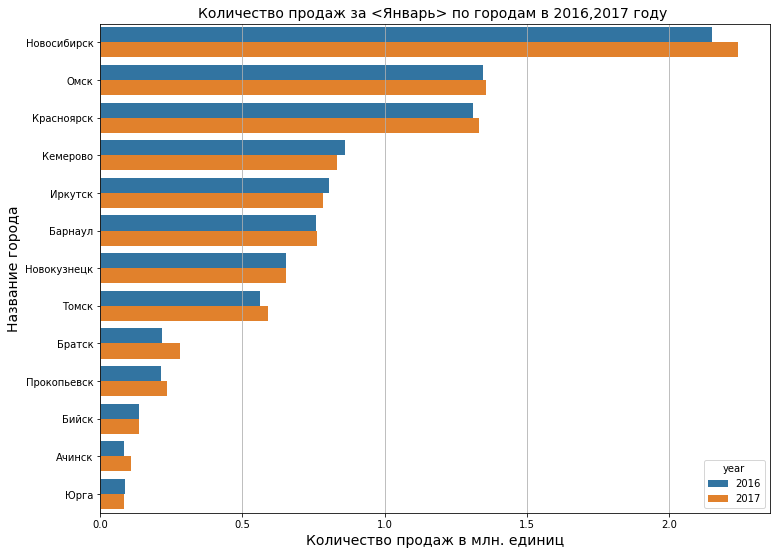

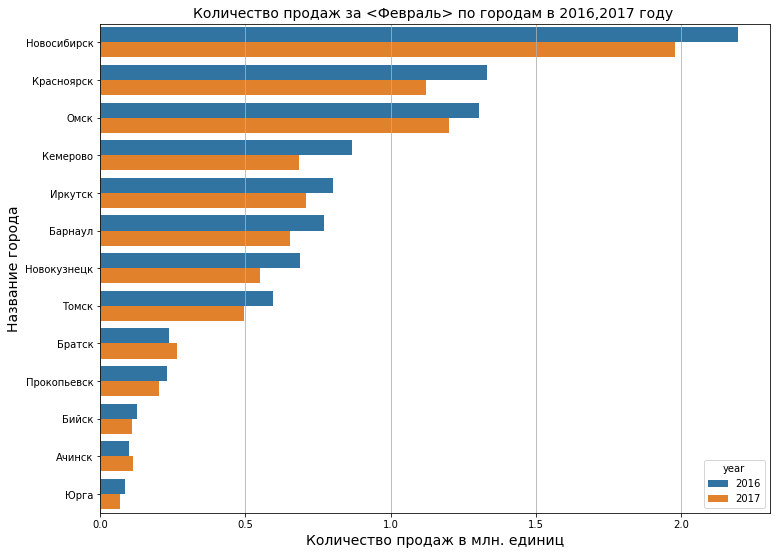

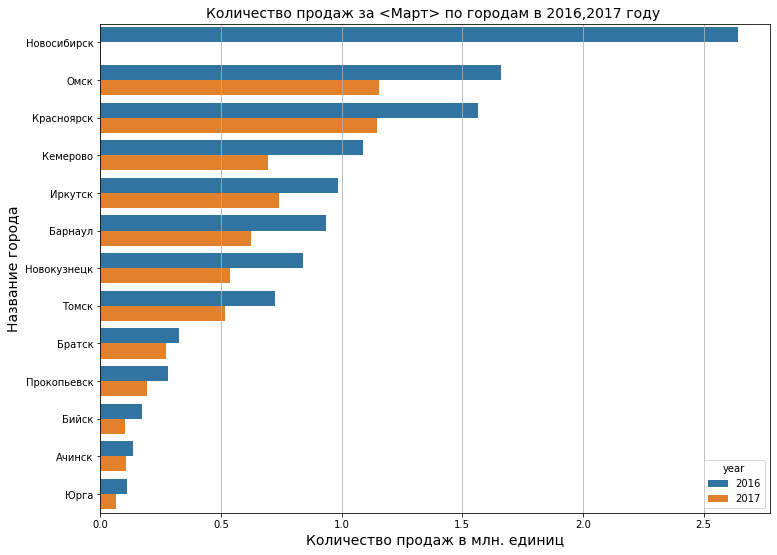

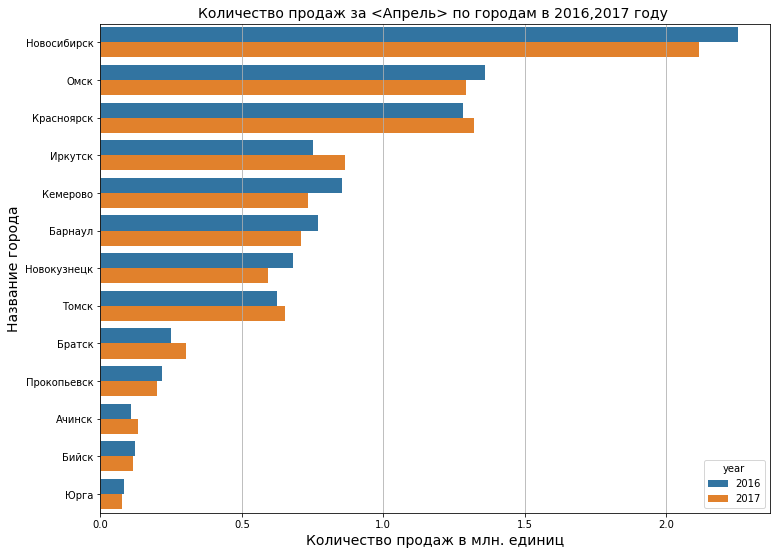

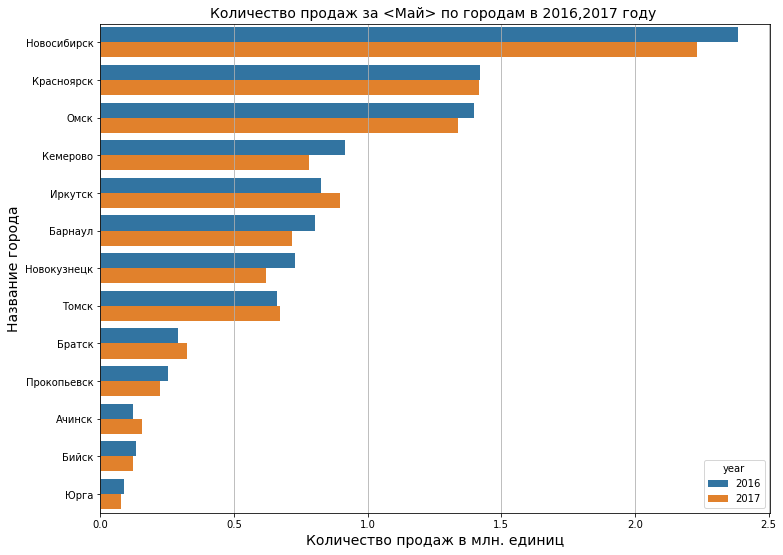

In [20]:
#функция для наименования графика
def func_month_of_year(col):
  if col == 1: month_of_year =  'Январь'
  if col == 2: month_of_year =  'Февраль'
  if col == 3: month_of_year =  'Март'
  if col == 4: month_of_year =  'Апрель'
  if col == 5: month_of_year =  'Май'
  return month_of_year

for col in [1,2,3,4,5]:
  month_of_year = ''
  plt.figure(figsize=(12,9))
  plt.grid()
  #фильтруем данные за месяц
  city_month = df[df['month'] == col].groupby(['city','year'])['amount'].sum().reset_index().sort_values(by ='amount', ascending = False)
  city_month['amount'] = city_month['amount'] /1000000
  #строим график
  ax = sns.barplot(x='amount', y='city', hue = 'year', data=city_month)
  ax.set_xlabel('Количество продаж в млн. единиц', fontsize=14)
  ax.set_ylabel('Название города', fontsize=14)
  ax.set_title('Количество продаж за <{}> по городам в 2016,2017 году '.format(func_month_of_year(col)), fontsize=14);
  plt.show();

**Вывод**

**В Марте отсутствуют данные по Новосибирску за 2017 год**  
В Январе, Апреле и Мае у нас примерно одинаковые продажи в 2016 и 2017 году    
В Феврале и Марте разница в продажах более выраженная.  


### Разница по категориям товаров в Марте 2016 и 2017 года

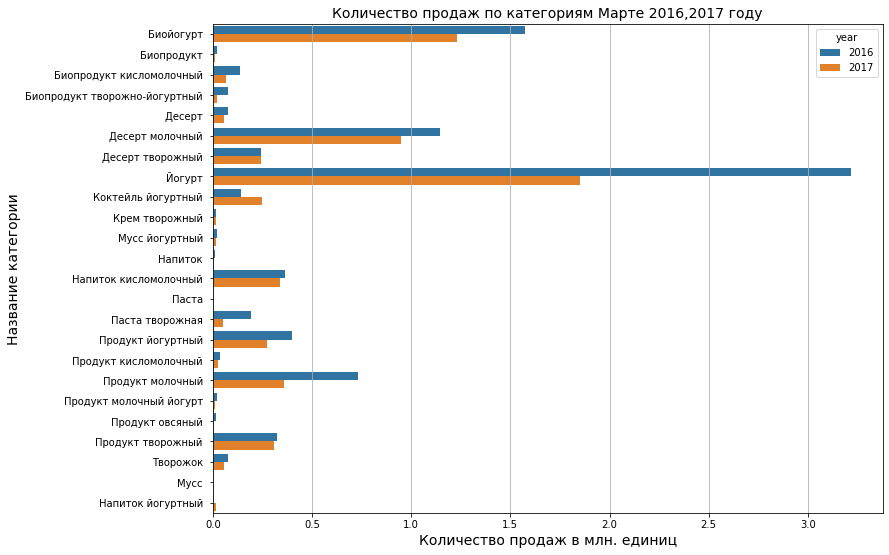

In [21]:
df_category = df[(df['city'] != 'Новосибирск') & (df['month'] == 3)].groupby(['year','category'])['amount'].sum().reset_index()
df_category['amount'] =  df_category['amount'] /1000000
plt.figure(figsize=(12,9))
plt.grid()
ax = sns.barplot(x='amount', y='category', hue = 'year', data=df_category)
ax.set_xlabel('Количество продаж в млн. единиц', fontsize=14)
ax.set_ylabel('Название категории', fontsize=14)
ax.set_title('Количество продаж по категориям Марте 2016,2017 году', fontsize=14);
plt.show();

**Вывод**

По каждой категории товара в Марте в 2016 году было большее количество, чем в 2017. Сильно выделяются значения по Категории товаров "Йогурт".   
Посмотрим продажи в разрезе производителей категории "Йогурт" в Марте, без города Новосибирск

### Продажи по произвоителям в категории "Йогурт" в Марте 2016 и 2017 года (без города Новосибирск)

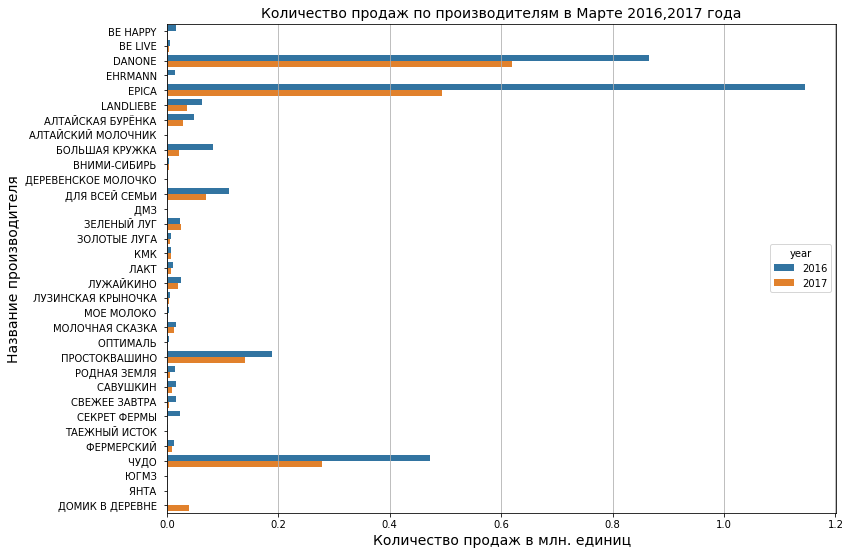

In [22]:
sales = df.query('(city != "Новосибирск") and (month == "3") and (category == "Йогурт ")')
sales = sales[['year','city','amount','maker']]
df_maker = sales.groupby(['year','maker'])['amount'].sum().reset_index()
df_maker['amount'] =  df_maker['amount'] /1000000
plt.figure(figsize=(12,9))
plt.grid()
ax = sns.barplot(x='amount', y='maker', hue = 'year', data=df_maker)
ax.set_xlabel('Количество продаж в млн. единиц', fontsize=14)
ax.set_ylabel('Название производителя', fontsize=14)
ax.set_title('Количество продаж по производителям в Марте 2016,2017 года', fontsize=14);
plt.show();

In [23]:
df_maker = sales.pivot_table(index = 'maker' , columns='year', values='amount', aggfunc='sum').reset_index().fillna(0) 
df_maker['diff'] = df_maker[2016] - df_maker[2017] 
df_maker.sort_values(by='diff', ascending = False).head(3)

year,maker,2016,2017,diff
4,EPICA,1144596.0,493185.0,651411.0
2,DANONE,866041.0,620419.0,245622.0
30,ЧУДО,472977.0,278276.0,194701.0


**Вывод**

Разница в продажах между 2016 и 2017 наиболее заметная по производителям DANON, EPICA, ЧУДО.  

## Общий вывод

1. Данные для анализа по продажам йогуртов  были предоставлены за период :  
 - Январь – Май 2016 года  
 - Январь  - Май 2017 года.    
На основании полученных данных был проведен анализ в сравнении соответствующих периодов.  
2. Данные были предоставлены  в разрезе 13ти городов различного масштаба : Новосибирск, Омск, Красноярск, Кемерово, Иркутск, Ачинск,  Бийск, Прокопьевск, Братск, Юрга, Барнаул, Томск, Новокузнецк.   
3. Количество продаж 2016 года превышает продажи  2017 года, в соответствующих месяцах.  
4. В качестве баг-репорта можно указать отсутствие данных по Новосибирску за 2017 год.  
5. Проанализировав продажи за Март (за исключением Новосибирска) было выявлено большая разница в продажах категории Йогуртов по производителям DANON, EPICA, ЧУДО.
